In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("orders.csv")
df

,created_at_utc,tariff_class,tariff_internal_name,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,driver_call_model
0,1622145491,Эконом,econom,cancelled,waiting,Kia Rio,белый,34,52.00,RUB,no_call
1,1622145422,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00,RUB,no_call
2,1622145212,Эконом,econom,finished,complete,Renault Logan,белый,34,104.70,RUB,on_demand
3,1622054615,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00,RUB,on_demand
4,1622045036,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50,RUB,on_demand
...,...,...,...,...,...,...,...,...,...,...,...
1200,1617028952,Эконом,econom,finished,complete,LADA (ВАЗ) Largus,белый,34,472.40,RUB,no_call
1201,1617028458,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,белый,34,0.00,RUB,no_call
1202,1617025078,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,серый,34,146.85,RUB,no_call
1203,1616869125,Эконом,econom,cancelled,driving,LADA (ВАЗ) Largus,серый,34,0.00,RUB,no_call


In [3]:
#Converting to date-time
df['created_at_utc'] = df['created_at_utc']
df['created_at_utc'] = pd.to_datetime(df.created_at_utc, unit='s')
df.sort_values(by=['created_at_utc'], inplace=True, ascending=False)

#Adding sepearte columns for year and month
df.loc[:, 'year'] = df['created_at_utc'].dt.year
df.loc[:, 'month'] = df['created_at_utc'].dt.month

In [4]:
print(df.groupby('tariff_class').payment_cost.count(),'------')
print(df.groupby('status').payment_cost.count(),'------')
print(df.groupby('taxi_status').payment_cost.count(),'------')
print(df.groupby('vehicle_color').payment_cost.count(),'------')
print(df.groupby('driver_call_model').payment_cost.count(),'------')

tariff_class
Доставка      2
Комфорт     450
Комфорт+     45
Эконом      708
Name: payment_cost, dtype: int64 ------
status
cancelled    245
finished     960
Name: payment_cost, dtype: int64 ------
taxi_status
cancelled         7
complete        945
driving         217
failed            8
transporting      5
waiting          23
Name: payment_cost, dtype: int64 ------
vehicle_color
бежевый             24
белый              644
голубой              9
жёлтый             225
зелёный              8
зелёный миндаль      1
коричневый          24
красный             16
оранжевый            1
песочный             1
серебристый          6
серый              134
синий               33
тёмно-зелёный        2
фиолетовый           3
чёрный              74
Name: payment_cost, dtype: int64 ------
driver_call_model
no_call      1199
on_demand       6
Name: payment_cost, dtype: int64 ------


In [5]:
#Easy to conclude which columns are irrelevent for analysis
df.drop(columns = ['created_at_utc','tariff_internal_name','taxi_status','driver_call_model'], inplace=True)

# Data analysis

got 960 finished orders


<Axes: ylabel='count'>

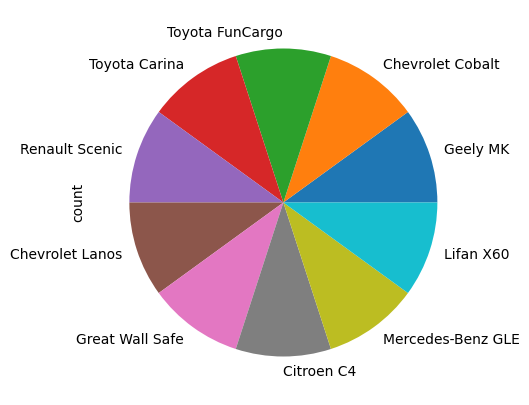

In [6]:
df = df.loc[df['status'] == 'finished']
print('got', len(df.index), 'finished orders')

vehicle_model_df = df['vehicle_model'].value_counts()
vehicle_model_df.sort_values().head(10).plot.pie(y='vehicle_model', figsize=(5, 5))
#vehicle_color_df = df['vehicle_color'].value_counts()
#vehicle_color_df.sort_values().head(10).plot.pie(y='vehicle_color', figsize=(5, 5))

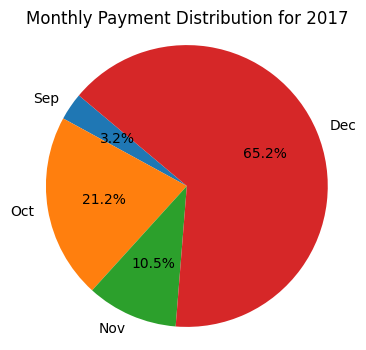

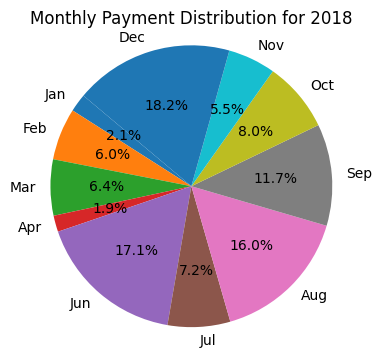

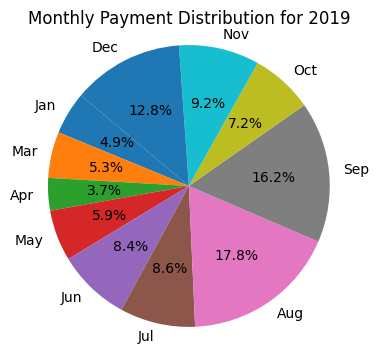

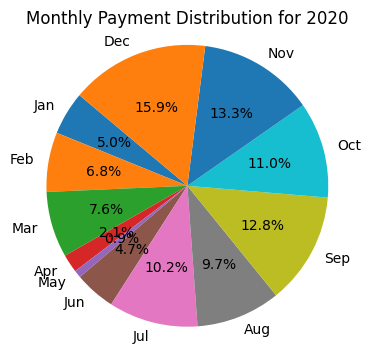

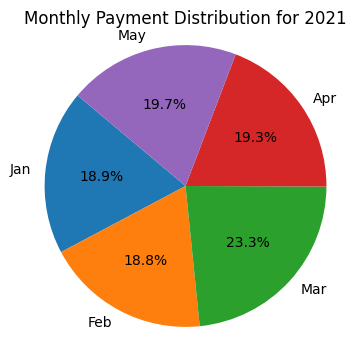

In [7]:
yearly_monthly_payment = df.groupby(['year', 'month'])['payment_cost'].sum()

# Plotting pie charts for each year
years = yearly_monthly_payment.index.levels[0]
for year in years:
    monthly_payment_year = yearly_monthly_payment.loc[year]
    plt.figure(figsize=(4, 4))
    plt.pie(monthly_payment_year, labels=monthly_payment_year.index.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}), autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Monthly Payment Distribution for {year}')
    plt.show()

In [8]:
df

,tariff_class,status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,year,month
2,Эконом,finished,Renault Logan,белый,34,104.70,RUB,2021,5
3,Эконом,finished,LADA (ВАЗ) Granta,белый,34,120.00,RUB,2021,5
4,Эконом,finished,LADA (ВАЗ) Granta,белый,34,115.50,RUB,2021,5
5,Эконом,finished,LADA (ВАЗ) Granta,белый,34,83.70,RUB,2021,5
6,Эконом,finished,Renault Logan,белый,34,461.90,RUB,2021,5
...,...,...,...,...,...,...,...,...,...
1140,Эконом,finished,Mitsubishi Lancer,чёрный,34,0.00,RUB,2017,10
1141,Эконом,finished,Renault Duster,чёрный,34,425.50,RUB,2017,10
1142,Эконом,finished,Geely MK,красный,34,438.15,RUB,2017,10
1143,Эконом,finished,Hyundai Sonata,серый,30,98.90,RUB,2017,9


# ML Regression methods

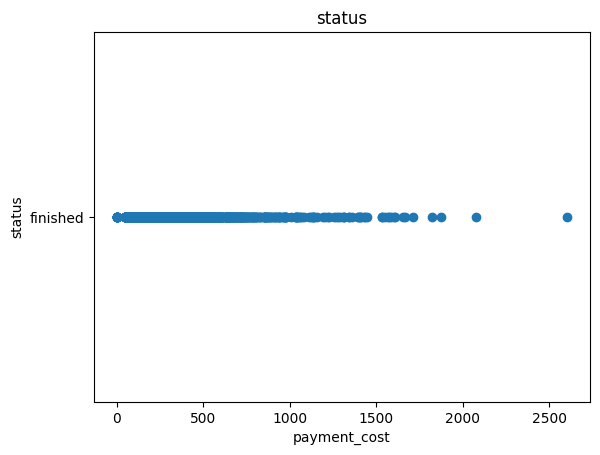

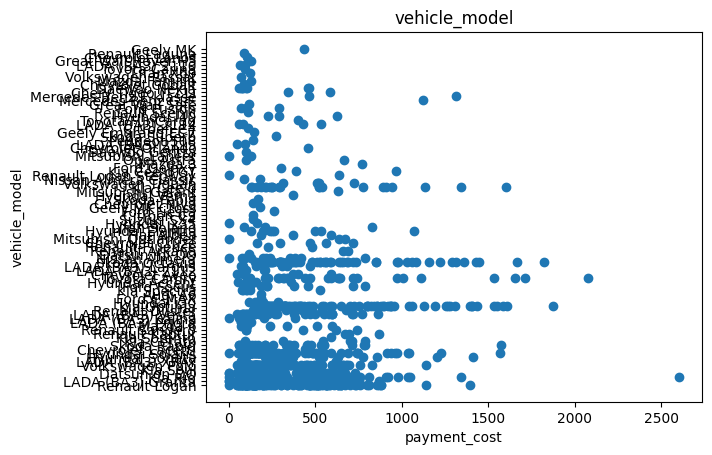

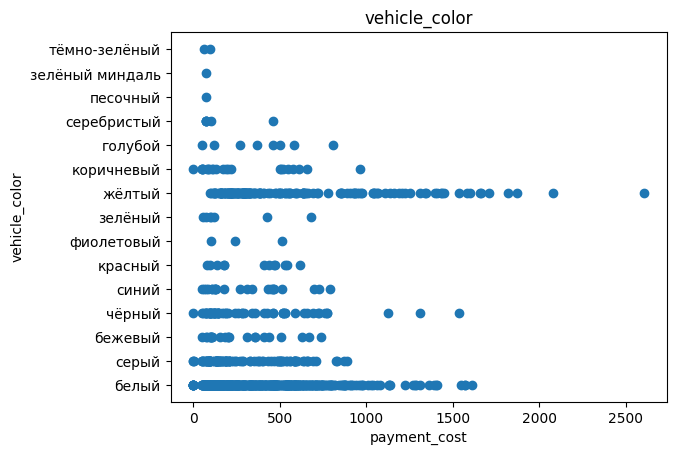

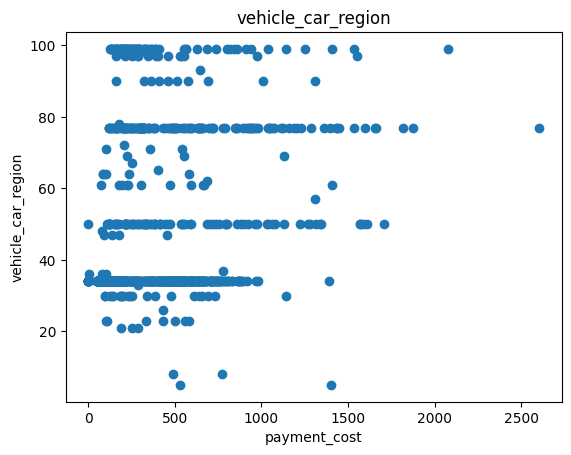

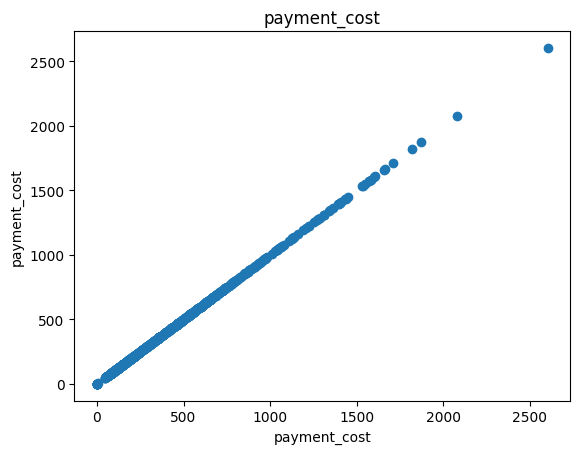

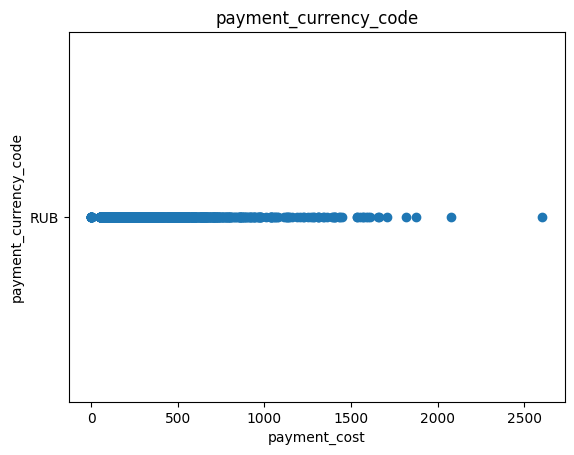

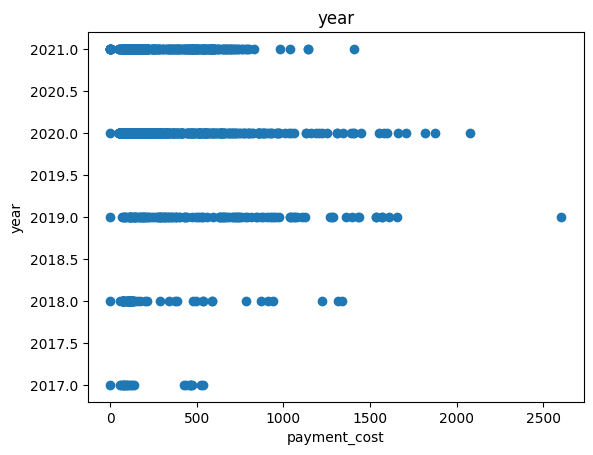

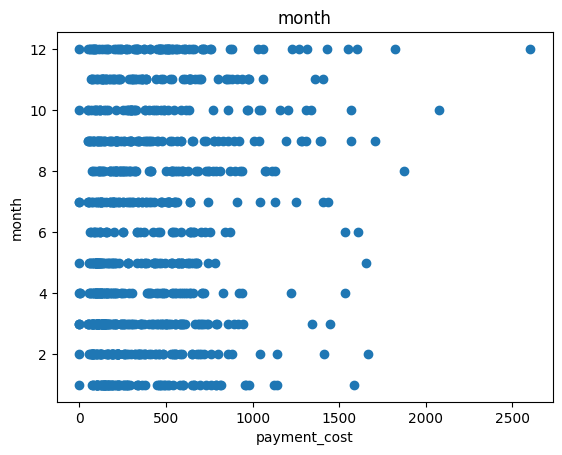

In [9]:
#Analyse correlation between taxi cost and other values:
for label in df.columns[1:]:
    plt.scatter(df["payment_cost"],df[label])
    plt.title(label)
    plt.ylabel(label)
    plt.xlabel("payment_cost")
    plt.show()

In [10]:
df_ML_method = df
#Preparing data for ML operatons
df_ML_method = df_ML_method[(df_ML_method['status'] == 'finished')]
df_ML_method = df[['year','month','payment_cost']]

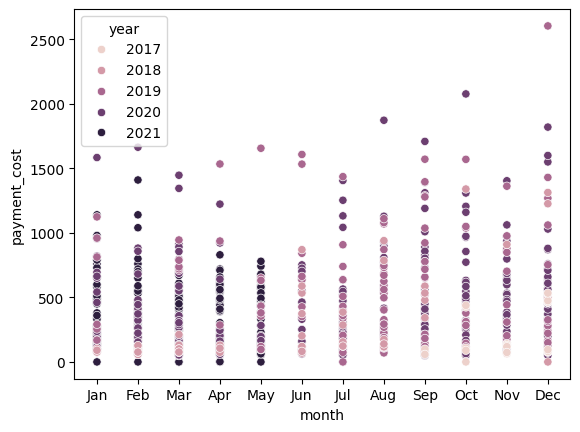

In [11]:
sns.scatterplot(data=df_ML_method, x='month', y='payment_cost', hue='year')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [12]:
X = df_ML_method[['year', 'month']]
y = df_ML_method['payment_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Random Forest
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

#Support Vector Regression
svr_model = SVR(kernel='linear')
svr_model = svr_model.fit(X_train, y_train)

#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Model Evaluation
RF_pred = RF_model.predict(X_test)
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error:", mse,"RF model")

svr_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, svr_pred)
print("Mean Squared Error:", mse, "SVR model")

lr_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error:", mse,"Lin Regr. model")

Mean Squared Error: 88101.00928006151 RF model
Mean Squared Error: 90325.89705409338 SVR model
Mean Squared Error: 88246.28847074513 Lin Regr. model


In [35]:
#Prediction for future ride costs
future_data = pd.DataFrame({'year': [2024], 'month': [8]})  # Example future data
print("Predicted ride cost for May 2024:", RF_model.predict(future_data))
print("Predicted ride cost for May 2024:", svr_model.predict(future_data))
print("Predicted ride cost for May 2024:", lr_model.predict(future_data))

Predicted ride cost for May 2024: [457.4871129]
Predicted ride cost for May 2024: [372.96666667]
Predicted ride cost for May 2024: [410.46492968]


In [36]:
#Make datadet for models:
future_months = np.arange(1, 13)
future_years = np.full_like(future_months, 2022)
future_data = pd.DataFrame({'year': future_years, 'month': future_months})

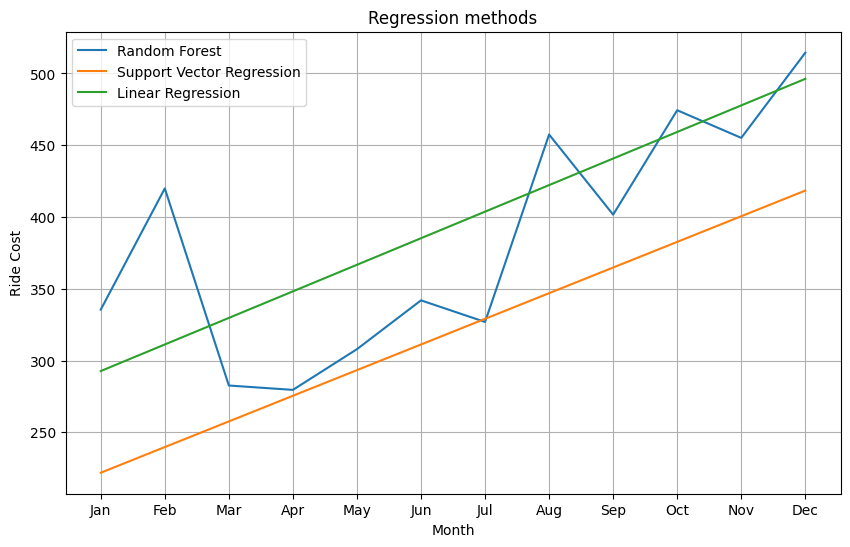

In [37]:
predicted_costs_RF = RF_model.predict(future_data)
predicted_costs_svr = svr_model.predict(future_data)
predicted_costs_lr = lr_model.predict(future_data)

predicted_RF = pd.DataFrame({
    'year': future_years,
    'month': future_months,
    'payment_cost': predicted_costs_RF
})

predicted_svr = pd.DataFrame({
    'year': future_years,
    'month': future_months,
    'payment_cost': predicted_costs_svr
})

predicted_lr = pd.DataFrame({
    'year': future_years,
    'month': future_months,
    'payment_cost': predicted_costs_lr
})
plt.figure(figsize=(10, 6))
sns.lineplot(data=predicted_RF, x='month', y='payment_cost',label='Random Forest')
sns.lineplot(data=predicted_svr, x='month', y='payment_cost',label='Support Vector Regression')
sns.lineplot(data=predicted_lr, x='month', y='payment_cost',label='Linear Regression')
plt.title('Regression methods')
plt.xlabel('Month')
plt.ylabel('Ride Cost')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

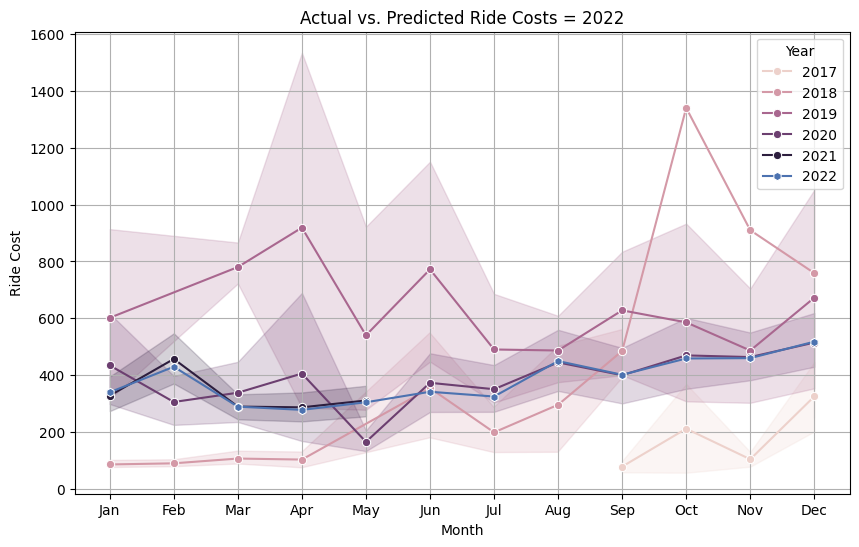

In [19]:
predicted_costs_2022 = RF_model.predict(future_data)

predicted_df = pd.DataFrame({
    'year': future_years,
    'month': future_months,
    'payment_cost': predicted_costs_2022
})

combined_df = pd.concat([df_ML_method, predicted_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ML_method, x='month', y='payment_cost', hue='year', marker = 'o')
sns.lineplot(data=predicted_df, x='month', y='payment_cost', hue='year', marker = 'h', palette="deep")
plt.title('Actual vs. Predicted Ride Costs = 2022')
plt.xlabel('Month')
plt.ylabel('Ride Cost')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

# Classification Problem

In [44]:
df_ML_method_2 = df

df_ML_method_2 = df[['vehicle_model','tariff_class','payment_cost']]

In [45]:
X = df_ML_method_2[['vehicle_model', 'tariff_class']]
y = df_ML_method_2['payment_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

# Model Evaluation
RF_pred = RF_model.predict(X_test)
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error:", mse,"RF model")

future_data = pd.DataFrame({'vehicle_model': 'Renault Logan', 'month': 'Эконом'})  # Example future data
print("Predicted ride cost for Renault Logan Эконом:", RF_model.predict(future_data))

ValueError: could not convert string to float: 'Datsun on-DO'